#  Импортируем необходимые либы

In [1]:
import pandas as pd 
import numpy as np 
import os
import hashlib
import cv2
import math
from PIL import Image

In [2]:
dir_files = os.listdir(".")
dir_files

['Classification_library.py',
 'pp_tool.py',
 'Cystine',
 'type_plasma_model.pth',
 'Uric acid',
 'averaged_model.pth',
 'lol.py',
 'Unclass',
 '__pycache__',
 'test_df.xlsx',
 'Unclass_df.xlsx',
 'Calcium',
 'Classification_library.py:Zone.Identifier',
 'Prediction_tool.py',
 'o',
 'обучение_типу_камня_по_plasma.ipynb',
 'p_tool.py',
 'best_model.pth',
 'Prediction_tool.py:Zone.Identifier']

# функция для поиска в глубину png файлов

In [3]:
def get_png_files(path='.'):
    png_files = []
    
    def dfs_search(current_path):
        try:
            for entry in os.listdir(current_path):
                full_path = os.path.join(current_path, entry)
                if os.path.isfile(full_path):
                    if full_path.lower().endswith('.png'):
                        png_files.append(full_path)
                elif os.path.isdir(full_path):
                    dfs_search(full_path)
        except PermissionError:
            pass  #пропускаем директории, к которым нет доступа
    
    dfs_search(path)
    return png_files

# Цистиновые

In [4]:
Cystine_files = get_png_files('Cystine')
print(f"Found {len(Cystine_files)} PNG files:")

Found 2245 PNG files:


# Урататные

In [5]:
os.listdir("Uric acid")

['Pure uric acid', 'Uric acid with calcium']

In [6]:
Uric_acid_files = get_png_files('Uric acid/Pure uric acid')
print(f"Found {len(Uric_acid_files)} PNG files:")

Found 7428 PNG files:


In [7]:
Uric_acid_calcium_files = get_png_files('Uric acid/Uric acid with calcium')
print(f"Found {len(Uric_acid_calcium_files)} PNG files:")

Found 7527 PNG files:


# Неклассифицированные

In [8]:
Unclass_files = get_png_files('Unclass')
print(f"Found {len(Unclass_files)} PNG files:")

Found 19217 PNG files:


# Кальциевые

In [9]:
Calcium_files = get_png_files('Calcium')
print(f"Found {len(Calcium_files)} PNG files:")

Found 29210 PNG files:


In [10]:
# функция по прочистке от сплошных изображений
def del_solid_color_images(path):
    image = cv2.imread(path)
    if image is None:
        return 0
        
    # Проверяем, все ли пиксели одинаковы в каждом канале
    if len(image.shape) == 3:  # Цветное изображение (BGR)
        b, g, r = cv2.split(image)
        if (
            np.all(b == b[0,0]) and 
            np.all(g == g[0,0]) and 
            np.all(r == r[0,0])
        ):
            os.remove(path)
            return 1
    
    # Для одноканальных изображений (оттенки серого)
    elif len(image.shape) == 2:  
        if np.all(image == image[0,0]):
            os.remove(path)
            return 1
            
    return 0

# Цистиновые

In [11]:
Cystine_files_del_count = 0

for path in Cystine_files:
    Cystine_files_del_count += del_solid_color_images(path=path)

Cystine_files_del_count

0

In [12]:
Cystine_files = get_png_files('Cystine')
print(f"Found {len(Cystine_files)} PNG files:")

Found 2245 PNG files:


In [13]:
Cystine_df = pd.DataFrame(columns=["Path", "Type"])
Cystine_df["Path"] = Cystine_files
Cystine_df["Type"] = "Cystine"
Cystine_df

,Path,Type
0,Cystine/Stone 36__/36_570_plasma.png,Cystine
1,Cystine/Stone 36__/36_530_plasma.png,Cystine
2,Cystine/Stone 36__/36_889_plasma.png,Cystine
3,Cystine/Stone 36__/36_618_plasma.png,Cystine
4,Cystine/Stone 36__/36_645_plasma.png,Cystine
...,...,...
2240,Cystine/Stone 153/153_210_plasma.png,Cystine
2241,Cystine/Stone 153/10153_210_plasma.png,Cystine
2242,Cystine/Stone 153/10153_70_plasma.png,Cystine
2243,Cystine/Stone 153/153_830_plasma.png,Cystine


# Урататные

In [14]:
Uric_acid_files_del_count = 0

for path in Uric_acid_files:
    Uric_acid_files_del_count += del_solid_color_images(path=path)

Uric_acid_files_del_count
    

0

In [15]:
Uric_acid_files = get_png_files('Uric acid/Pure uric acid')
print(f"Found {len(Uric_acid_files)} PNG files:")

Found 7428 PNG files:


In [16]:
Uric_acid_df = pd.DataFrame(columns=["Path", "Type"])
Uric_acid_df["Path"] = Uric_acid_files
Uric_acid_df["Type"] = "Uric acid"
Uric_acid_df

,Path,Type
0,Uric acid/Pure uric acid/Stone 33/10033_1270_p...,Uric acid
1,Uric acid/Pure uric acid/Stone 33/10033_910_pl...,Uric acid
2,Uric acid/Pure uric acid/Stone 33/10033_1470_p...,Uric acid
3,Uric acid/Pure uric acid/Stone 33/10033_1740_p...,Uric acid
4,Uric acid/Pure uric acid/Stone 33/10033_1080_p...,Uric acid
...,...,...
7423,Uric acid/Pure uric acid/Stone 13__/13_1296_pl...,Uric acid
7424,Uric acid/Pure uric acid/Stone 13__/13_1450_pl...,Uric acid
7425,Uric acid/Pure uric acid/Stone 13__/13_1208_pl...,Uric acid
7426,Uric acid/Pure uric acid/Stone 13__/13_877_pla...,Uric acid


In [17]:
Uric_acid_calcium_files_del_count = 0

for path in Uric_acid_calcium_files:
    Uric_acid_calcium_files_del_count += del_solid_color_images(path=path)

Uric_acid_calcium_files_del_count

0

In [18]:
Uric_acid_calcium_files = get_png_files('Uric acid/Uric acid with calcium')
print(f"Found {len(Uric_acid_calcium_files)} PNG files:")

Found 7527 PNG files:


In [19]:
Uric_acid_calcium_df = pd.DataFrame(columns=["Path", "Type"])
Uric_acid_calcium_df["Path"] = Uric_acid_calcium_files
Uric_acid_calcium_df["Type"] = "Uric acid calcium"
Uric_acid_calcium_df

,Path,Type
0,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
1,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
2,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
3,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
4,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
...,...,...
7522,Uric acid/Uric acid with calcium/Stone 32__/32...,Uric acid calcium
7523,Uric acid/Uric acid with calcium/Stone 32__/32...,Uric acid calcium
7524,Uric acid/Uric acid with calcium/Stone 32__/32...,Uric acid calcium
7525,Uric acid/Uric acid with calcium/Stone 32__/32...,Uric acid calcium


# Неклассифицированные

In [20]:
Unclass_files_del_count = 0

for path in Unclass_files:
    Unclass_files_del_count += del_solid_color_images(path=path)

Unclass_files_del_count

0

In [21]:
Unclass_files = get_png_files('Unclass')
print(f"Found {len(Unclass_files)} PNG files:")

Found 19217 PNG files:


In [22]:
Unclass_df = pd.DataFrame(columns=["Path", "Type"])
Unclass_df["Path"] = Unclass_files
Unclass_df["Type"] = "Unclass"
Unclass_df

,Path,Type
0,Unclass/Stone 19_2_/10020_750_plasma.png,Unclass
1,Unclass/Stone 19_2_/10020_677_plasma.png,Unclass
2,Unclass/Stone 19_2_/10020_1031_plasma.png,Unclass
3,Unclass/Stone 19_2_/10020_1315_plasma.png,Unclass
4,Unclass/Stone 19_2_/10020_610_plasma.png,Unclass
...,...,...
19212,Unclass/Stone 11__/11_1054_plasma.png,Unclass
19213,Unclass/Stone 11__/11_535_plasma.png,Unclass
19214,Unclass/Stone 11__/11_61_plasma.png,Unclass
19215,Unclass/Stone 11__/11_920_plasma.png,Unclass


# Кальциевые

In [23]:
Calcium_files_del_count = 0

for path in Calcium_files:
    Calcium_files_del_count += del_solid_color_images(path=path)

Calcium_files_del_count

0

In [24]:
Calcium_files = get_png_files('Calcium')
print(f"Found {len(Calcium_files)} PNG files:")

Found 29210 PNG files:


In [25]:
Calcium_df = pd.DataFrame(columns=["Path", "Type"])
Calcium_df["Path"] = Calcium_files
Calcium_df["Type"] = "Calcium"
Calcium_df

,Path,Type
0,Calcium/Stone 50__/50_770_plasma.png,Calcium
1,Calcium/Stone 50__/50_954_plasma.png,Calcium
2,Calcium/Stone 50__/50_492_plasma.png,Calcium
3,Calcium/Stone 50__/50_962_plasma.png,Calcium
4,Calcium/Stone 50__/50_647_plasma.png,Calcium
...,...,...
29205,Calcium/Stone 31_/10031_915_plasma.png,Calcium
29206,Calcium/Stone 31_/10031_696_plasma.png,Calcium
29207,Calcium/Stone 31_/10031_798_plasma.png,Calcium
29208,Calcium/Stone 31_/10031_973_plasma.png,Calcium


# Соберем датафрейм со всеми камнями

In [26]:
Cystine_df.shape

(2245, 2)

In [27]:
Uric_acid_df.shape

(7428, 2)

In [28]:
Uric_acid_calcium_df.shape

(7527, 2)

In [29]:
Calcium_df.shape

(29210, 2)

In [33]:
complited_data = pd.concat([Cystine_df,
                            Uric_acid_df, Uric_acid_calcium_df, Calcium_df], ignore_index=True)

In [34]:
complited_data[complited_data["Type"] == 'Cystine']

,Path,Type
0,Cystine/Stone 36__/36_570_plasma.png,Cystine
1,Cystine/Stone 36__/36_530_plasma.png,Cystine
2,Cystine/Stone 36__/36_889_plasma.png,Cystine
3,Cystine/Stone 36__/36_618_plasma.png,Cystine
4,Cystine/Stone 36__/36_645_plasma.png,Cystine
...,...,...
2240,Cystine/Stone 153/153_210_plasma.png,Cystine
2241,Cystine/Stone 153/10153_210_plasma.png,Cystine
2242,Cystine/Stone 153/10153_70_plasma.png,Cystine
2243,Cystine/Stone 153/153_830_plasma.png,Cystine


In [35]:
complited_data

,Path,Type
0,Cystine/Stone 36__/36_570_plasma.png,Cystine
1,Cystine/Stone 36__/36_530_plasma.png,Cystine
2,Cystine/Stone 36__/36_889_plasma.png,Cystine
3,Cystine/Stone 36__/36_618_plasma.png,Cystine
4,Cystine/Stone 36__/36_645_plasma.png,Cystine
...,...,...
46405,Calcium/Stone 31_/10031_915_plasma.png,Calcium
46406,Calcium/Stone 31_/10031_696_plasma.png,Calcium
46407,Calcium/Stone 31_/10031_798_plasma.png,Calcium
46408,Calcium/Stone 31_/10031_973_plasma.png,Calcium


In [36]:
complited_data["Type"].value_counts()

Type
Calcium              29210
Uric acid calcium     7527
Uric acid             7428
Cystine               2245
Name: count, dtype: int64

In [37]:
complited_data["Type"].unique()

array(['Cystine', 'Uric acid', 'Uric acid calcium', 'Calcium'],
      dtype=object)

In [38]:
def calculate_img_hash(path):
    try:
        with Image.open(path) as img:
            
            img = img.convert("RGB")
            
        img_array = np.array(img)
        return hashlib.md5(img_array.tobytes()).hexdigest()

    except Exception as e:
        print(f"Ошибка при обработке {path}: {str(e)}")
        return None

In [39]:
complited_data["hash"] = complited_data["Path"].apply(calculate_img_hash)

In [40]:
complited_data.shape

(46410, 3)

In [41]:
complited_data = complited_data.dropna(subset=["hash"])

In [42]:
complited_data.shape

(46410, 3)

In [43]:
complited_data = complited_data.drop_duplicates(subset=["hash"])

In [44]:
complited_data.shape

(41460, 3)

In [45]:
complited_data["Type"].value_counts()

Type
Calcium              24469
Uric acid calcium     7525
Uric acid             7222
Cystine               2244
Name: count, dtype: int64

In [46]:
from Classification_library import Learning_rocks

In [47]:
device = 'cuda'
print(f"Выбрано устройство: {device}")  

BATCH_SIZE = 64
NUM_EPOCHS = 20
NUM_WORKERS = 16

Выбрано устройство: cuda


In [48]:
idx_info = {0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

In [49]:
minor_classes = [list(idx_info.values()).index('Cystine'), 
                 list(idx_info.values()).index('Uric acid calcium'),
                 list(idx_info.values()).index('Uric acid calcium')]

In [50]:
complited_data["Type"].value_counts()

Type
Calcium              24469
Uric acid calcium     7525
Uric acid             7222
Cystine               2244
Name: count, dtype: int64

In [51]:
type_plasma_model = Learning_rocks(df = complited_data, device = device, model_name = f'type_plasma_model.pth', BATCH_SIZE = BATCH_SIZE, num_ep = NUM_EPOCHS, num_workers=NUM_WORKERS, #minor_classes=minor_classes,
    focal_gamma=3.0, major_aug= True, aug=True)



Minor classes: None
Sample label: 1, type: <class 'numpy.int64'>


In [52]:
type_plasma_model.idx_output()

{0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

In [56]:
best_models, metrics = type_plasma_model.kfold_validation_best(n_splits=5, save_best_path = "best_model.pth")


Training Fold 1/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [17:07<00:00, 51.37s/it]


New best model found in fold 1 with recall: 0.9974

Training Fold 2/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [14:47<00:00, 44.40s/it]


New best model found in fold 2 with recall: 0.9980

Training Fold 3/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [15:01<00:00, 45.07s/it]



Training Fold 4/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [15:04<00:00, 45.24s/it]


New best model found in fold 4 with recall: 0.9981

Training Fold 5/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [15:48<00:00, 47.44s/it]


K-Fold Validation Results:
----------------------------------------
Best model from fold 4 with recall: 0.9981
Mean val_loss: 0.0113 ± 0.0045
Mean val_accuracy: 0.9983 ± 0.0008
Mean val_recall: 0.9973 ± 0.0010


In [51]:
best_models.__len__()

NameError: name 'best_models' is not defined

In [183]:
import copy

In [184]:
def average_models(models, num):
    avg_model = copy.deepcopy(models[0])
    for key in avg_model.keys():
        avg_model[key] = torch.stack([
            model[key].float() for model in models
        ]).mean(0)
    return avg_model


In [185]:
def average_models(models):
    """Усреднение весов моделей"""
    avg_model = copy.deepcopy(models[0])
    for key in avg_model.keys():
        avg_model[key] = torch.stack([
            model[key].float() for model in models
        ]).mean(0)
    return avg_model

# Загрузка усредненной модели
final_model = CustomNet(num_classes=type_plasma_model.count_of_classes).to('cuda')
final_model.load_state_dict(average_models(best_models))
torch.save(final_model.state_dict(), 'averaged_model.pth')

NameError: name 'CustomNet' is not defined

In [186]:

def select_best_model(models, metrics):
    """Выбор лучшей модели на основе метрик"""
    # Находим индекс модели с лучшей метрикой
    best_idx = np.argmax(metrics)
    print(f"Selected best model with index {best_idx} and metric value {metrics[best_idx]:.4f}")
    return models[best_idx]

In [187]:
best_model_state = select_best_model(best_models, fold_metrics)

# Сохранение лучшей модели
torch.save({
    'model_state_dict': best_model_state,
    'fold_metrics': fold_metrics,
    'best_index': np.argmax(fold_metrics)
}, 'best_single_model.pth')

NameError: name 'fold_metrics' is not defined

In [ ]:
#minor_classes = [list(idx_info.values()).index('Cystine')]

In [ ]:
#type_plasma_model = Learning_rocks(df = complited_data, device = device, model_name = f'type_plasma_model.pth', BATCH_SIZE = BATCH_SIZE, num_ep = NUM_EPOCHS, num_workers=NUM_WORKERS,)

Minor classes: None
Sample label: 1, type: <class 'numpy.int64'>


In [239]:
idx_info = type_plasma_model.idx_output()
idx_info

{0: 'Calcium', 1: 'Uric acid', 2: 'Uric acid calcium'}

In [240]:
complited_data['Type'].value_counts()

Type
Calcium              24469
Uric acid calcium     7525
Uric acid             7222
Name: count, dtype: int64

In [241]:
type_plasma_model.train_df

,Path,Type,hash,label
30570,Calcium/Stone 10/10010_1291_plasma.png,Calcium,9710706a44a6ceafb5bfe3ad80489ef6,0
11689,Uric acid/Uric acid with calcium/Stone 28_/100...,Uric acid calcium,1d37385d253838c3654c176e25646a47,2
28408,Calcium/Stone 50_/10050_481_plasma.png,Calcium,84fee66ad1df5730e15ff4f9f9662f57,0
7320,Uric acid/Pure uric acid/Stone 13__/13_985_pla...,Uric acid,33d01f1c7c52d19a929e46dc043a8120,1
40593,Calcium/Stone 9/10009_2021_plasma.png,Calcium,4ee7098a3b3de4039b5fa097afc17b06,0
...,...,...,...,...
23427,Calcium/Stone 16/10016_1588_plasma.png,Calcium,f505f59bdb96e6be0506815688d1cfec,0
5610,Uric acid/Pure uric acid/Stone 33_/10033_584_p...,Uric acid,d9d6e59978182042102bd508b414f24b,1
40902,Calcium/Stone 9/10009_586_plasma.png,Calcium,48d6458c6ccd49863e52e0787aade8cb,0
42552,Calcium/Stone 10_/10010_927_plasma.png,Calcium,260518a27058b1e4f1d6f281b7f9d1c6,0


In [242]:
type_plasma_model.val_df

,Path,Type,hash,label
26720,Calcium/Stone 18__/18_1024_plasma.png,Calcium,38d082edfcf52ad4f1887fd48d557be0,0
31253,Calcium/Stone 10/10010_1622_plasma.png,Calcium,85f9d20ecded9149ce388d7430cfb5aa,0
23397,Calcium/Stone 16/10016_799_plasma.png,Calcium,3687324f79f70883edfdf924b0bb9379,0
42453,Calcium/Stone 10_/10010_1252_plasma.png,Calcium,c47af7ea7a90f2d581a03ec77bac264e,0
3441,Uric acid/Pure uric acid/Stone 13/10013_1586_p...,Uric acid,be2a457468131ff6c1f2c9a32791d4fb,1
...,...,...,...,...
17943,Calcium/Stone 25_/10025_594_plasma.png,Calcium,02897f261092f2d00242872f62751db5,0
8227,Uric acid/Uric acid with calcium/Stone 28__/28...,Uric acid calcium,7fb09ffc6e0b6b8e86c46b3840f9e10d,2
36215,Calcium/Stone 18_/10018_741_plasma.png,Calcium,96c3588ca4eeedbcc6626a6c645d2b8e,0
12717,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium,642fcb5292415e193802b20973308692,2


In [243]:
type_plasma_model.test_df

,Path,Type,hash,label
41861,Calcium/Stone 10_/10010_1288_plasma.png,Calcium,89202bd6a71bdf6b4134981aa9942b76,0
22572,Calcium/Stone 16/10016_618_plasma.png,Calcium,3d356c42f9293bd82f33dd459a5375ee,0
32683,Calcium/Stone 18/10018_1435_plasma.png,Calcium,49af8ba08b4db0d2cecd7f191125d036,0
10682,Uric acid/Uric acid with calcium/Stone N2_/110...,Uric acid calcium,db8c87d7905b72ba8ad52e1fc61ba528,2
6141,Uric acid/Pure uric acid/Stone 33__/33_1330_pl...,Uric acid,79d8af85d117fe7833e99b4aa6b17f10,1
...,...,...,...,...
13568,Uric acid/Uric acid with calcium/Stone 32_/100...,Uric acid calcium,1630b9b14bdcd2e6a21d80c437c4cbdc,2
23759,Calcium/Stone 16/10016_1441_plasma.png,Calcium,e40c3cd48e88cfa8ecd1e2f3f99f6d09,0
40590,Calcium/Stone 9/10009_1866_plasma.png,Calcium,9a49fed70c96239df6d1914c728a4933,0
25877,Calcium/Stone 34/10034_1020_plasma.png,Calcium,4a35a94b9b844a3df1026daf731b644c,0


In [54]:
idx_info = type_plasma_model.idx_output()
idx_info

{0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

In [53]:
type_plasma_model.learn_model()

Epochs: 100%|██████████| 20/20 [23:36<00:00, 70.81s/it]


In [55]:
type_plasma_model.clear_memory()

In [56]:
Unclass_df

,Path,Type
0,Unclass/Stone 19_2_/10020_750_plasma.png,Unclass
1,Unclass/Stone 19_2_/10020_677_plasma.png,Unclass
2,Unclass/Stone 19_2_/10020_1031_plasma.png,Unclass
3,Unclass/Stone 19_2_/10020_1315_plasma.png,Unclass
4,Unclass/Stone 19_2_/10020_610_plasma.png,Unclass
...,...,...
19212,Unclass/Stone 11__/11_1054_plasma.png,Unclass
19213,Unclass/Stone 11__/11_535_plasma.png,Unclass
19214,Unclass/Stone 11__/11_61_plasma.png,Unclass
19215,Unclass/Stone 11__/11_920_plasma.png,Unclass


In [57]:
test_df = type_plasma_model.test_df
test_df

,Path,Type,hash,label
31636,Calcium/Stone 30/10030_649_plasma.png,Calcium,cbcc2a57e17669bcbfce00e080958357,0
11164,Uric acid/Uric acid with calcium/Stone 155_/10...,Uric acid calcium,39bd5e472ea034f004efe0797e9c72ea,3
1150,Cystine/Stone 36_/10036_516_plasma.png,Cystine,3c000d593eb69adba529d6175c3c45fd,1
12695,Uric acid/Uric acid with calcium/Stone N2_/110...,Uric acid calcium,c878ad82a0cd4ba5ad99721577f8eb58,3
32192,Calcium/Stone 10/10010_647_plasma.png,Calcium,634642adb6119bb6807121acfa9a118d,0
...,...,...,...,...
15098,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium,04884b5b65c13d09b2fd0d3a78bcc7b2,3
8904,Uric acid/Pure uric acid/Stone 13__/13_921_pla...,Uric acid,816518f3fe40571fee509fad49a3e676,2
21636,Calcium/Stone 34_/10034_942_plasma.png,Calcium,8723fe6ab407584b5415c76f84e46a76,0
2222,Cystine/Stone 153/153_990_plasma.png,Cystine,6692a98719cdf3916ae25ff07e458e79,1


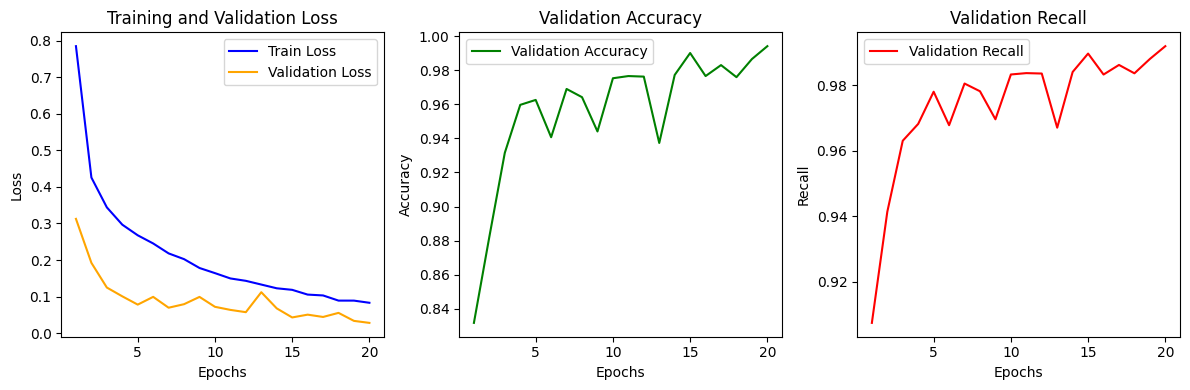

In [58]:
met_info = type_plasma_model.output_met()
met_info

In [59]:
idx_info = type_plasma_model.idx_output()
idx_info

{0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

In [60]:
len(idx_info)

4

In [61]:
from Prediction_tool import Predict
from PIL import Image

In [62]:
type_plasma_model_test_model = ["best_model.pth", "averaged_model.pth", "type_plasma_model.pth"][-1]
type_plasma_model_test_model

'type_plasma_model.pth'

In [63]:
test_df = test_df.reset_index(drop=True)
test_df

,Path,Type,hash,label
0,Calcium/Stone 30/10030_649_plasma.png,Calcium,cbcc2a57e17669bcbfce00e080958357,0
1,Uric acid/Uric acid with calcium/Stone 155_/10...,Uric acid calcium,39bd5e472ea034f004efe0797e9c72ea,3
2,Cystine/Stone 36_/10036_516_plasma.png,Cystine,3c000d593eb69adba529d6175c3c45fd,1
3,Uric acid/Uric acid with calcium/Stone N2_/110...,Uric acid calcium,c878ad82a0cd4ba5ad99721577f8eb58,3
4,Calcium/Stone 10/10010_647_plasma.png,Calcium,634642adb6119bb6807121acfa9a118d,0
...,...,...,...,...
6215,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium,04884b5b65c13d09b2fd0d3a78bcc7b2,3
6216,Uric acid/Pure uric acid/Stone 13__/13_921_pla...,Uric acid,816518f3fe40571fee509fad49a3e676,2
6217,Calcium/Stone 34_/10034_942_plasma.png,Calcium,8723fe6ab407584b5415c76f84e46a76,0
6218,Cystine/Stone 153/153_990_plasma.png,Cystine,6692a98719cdf3916ae25ff07e458e79,1


In [64]:
test_df["Type"].value_counts()

Type
Calcium              3671
Uric acid calcium    1129
Uric acid            1084
Cystine               336
Name: count, dtype: int64

In [65]:
test_df.iloc[0].Path

'Calcium/Stone 30/10030_649_plasma.png'

In [66]:
type_plasma_model_predict = Predict(num_classes=len(idx_info), model_path = type_plasma_model_test_model)
type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(test_df.iloc[0].Path)
type_plasma_model_predict_result

Using device: cuda
GPU: NVIDIA GeForce RTX 4070 Laptop GPU


{'predicted_class': 0,
 'confidence': 0.9999984502792358,
 'probabilities': array([9.9999845e-01, 1.5476184e-06, 3.1687557e-09, 1.3722813e-09],
       dtype=float32)}

In [67]:
idx_info

{0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

In [68]:
# Укажите device='cuda' вместо 'gpu'
type_plasma_model_predict = Predict(
    num_classes=len(idx_info),
    model_path=type_plasma_model_test_model,
    device='cuda'  # Исправлено на 'cuda'
)

# Пример предсказания
result = type_plasma_model_predict.predict_single_patch(test_df.iloc[0].Path)
print(result)

Using device: cuda
GPU: NVIDIA GeForce RTX 4070 Laptop GPU
{'predicted_class': 0, 'confidence': 0.9999984502792358, 'probabilities': array([9.9999845e-01, 1.5476184e-06, 3.1687557e-09, 1.3722813e-09],
      dtype=float32)}


In [69]:
idx_info

{0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

# Теперь поработаем с test_df, заполним его

In [70]:
from tqdm import tqdm

In [71]:
complited_data["Type"].value_counts()

Type
Calcium              24469
Uric acid calcium     7525
Uric acid             7222
Cystine               2244
Name: count, dtype: int64

In [72]:
for i, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Processing images"):
    image_path = row["Path"]
    
    result = type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(image_path)
    
    predicted_label = result['predicted_class']
    probabilities = result['probabilities'] 
    
    test_df.at[i, 'Predicted_label'] = int(predicted_label)
    test_df.at[i, 'Predicted_type'] = idx_info[predicted_label]
    test_df.at[i, 'Confidence'] = result["confidence"]
    test_df.at[i, 'prob_Calcium'] = probabilities[0]
    test_df.at[i, 'prob_Cystine'] = probabilities[1]
    test_df.at[i, 'prob_Uric acid'] = probabilities[2]
    test_df.at[i, 'prob_Uric acid calcium'] = probabilities[3]
    

    
    
    
    


Processing images: 100%|██████████| 6220/6220 [00:44<00:00, 139.19it/s]


In [73]:
test_df.to_excel("test_df.xlsx")

# Посчитаем метрики

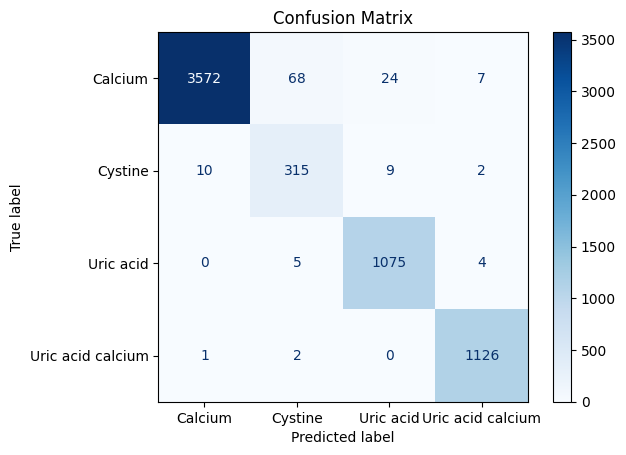

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_df['label'], test_df['Predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=list(idx_info.values()))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [75]:
cm

array([[3572,   68,   24,    7],
       [  10,  315,    9,    2],
       [   0,    5, 1075,    4],
       [   1,    2,    0, 1126]])

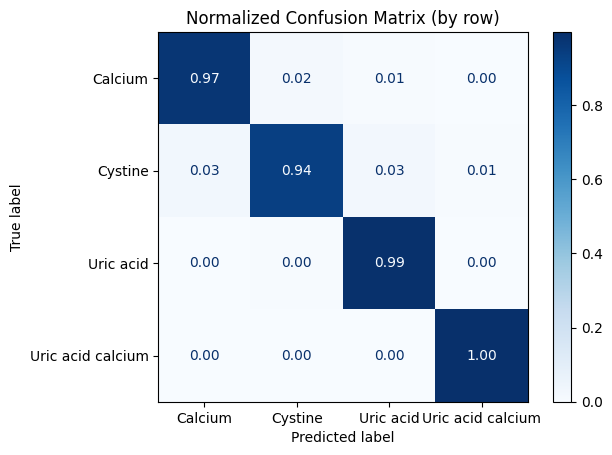

Normalized CM (row-wise):
[[0.973 0.019 0.007 0.002]
 [0.03  0.938 0.027 0.006]
 [0.    0.005 0.992 0.004]
 [0.001 0.002 0.    0.997]]


In [76]:


# Рассчитываем обычную матрицу ошибок
cm = confusion_matrix(test_df['label'], test_df['Predicted_label'])

# Нормируем матрицу по строкам (верные метки)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Создаем визуализацию с частотами
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized,
    display_labels=list(idx_info.values())
)

# Настраиваем формат отображения (два знака после запятой)
disp.plot(cmap='Blues', values_format='.2f')  # Используйте '.1%' для процентов

plt.title('Normalized Confusion Matrix (by row)')
plt.show()

# Выводим числовое представление матрицы (опционально)
print("Normalized CM (row-wise):")
print(np.round(cm_normalized, 3))

In [77]:
from sklearn.metrics import classification_report

print(classification_report(
    test_df['label'],
    test_df['Predicted_label'],
    target_names=list(idx_info.values())
))

                   precision    recall  f1-score   support

          Calcium       1.00      0.97      0.98      3671
          Cystine       0.81      0.94      0.87       336
        Uric acid       0.97      0.99      0.98      1084
Uric acid calcium       0.99      1.00      0.99      1129

         accuracy                           0.98      6220
        macro avg       0.94      0.97      0.96      6220
     weighted avg       0.98      0.98      0.98      6220



#  Cystine Их очень мало!!!  Можно ли побольше выделить????

In [84]:
Cystine_df.shape

(2245, 2)

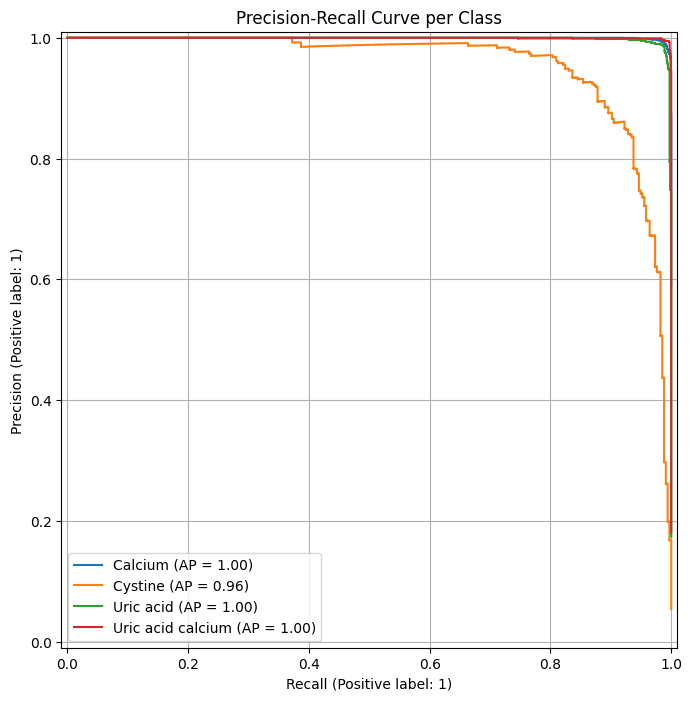

In [85]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

# Преобразуем метки в one-hot encoding
y_true = label_binarize(test_df['label'], classes=[0,1,2,3])
y_score = test_df[['prob_Calcium', "prob_Cystine",'prob_Uric acid', 'prob_Uric acid calcium']].values

# Создаем subplot для каждого класса
fig, ax = plt.subplots(figsize=(10, 8))
for i, cls in enumerate(idx_info.values()):
    PrecisionRecallDisplay.from_predictions(
        y_true[:, i],
        y_score[:, i],
        name=f"{cls}",
        ax=ax
    )
ax.set_title("Precision-Recall Curve per Class")
ax.legend(loc='best')
ax.grid()
plt.show()

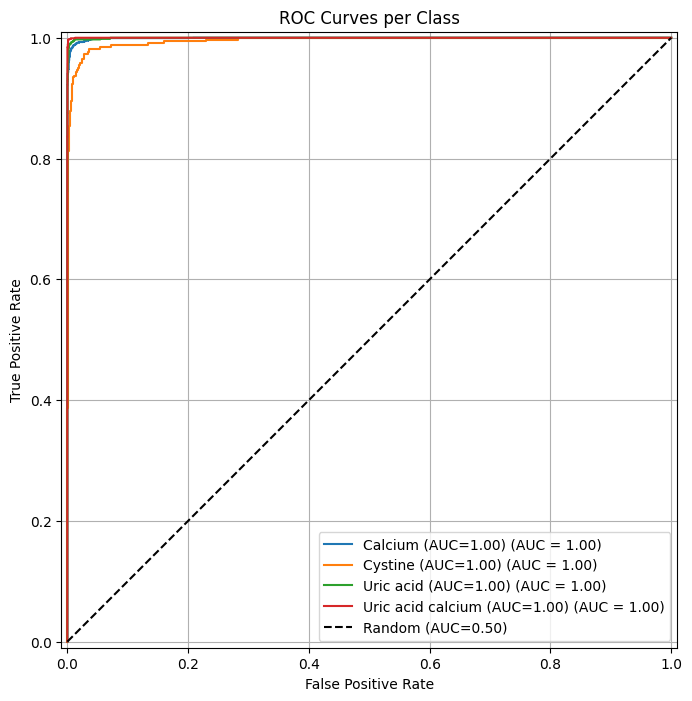

AUC Scores:
Calcium: 0.9994
Cystine: 0.9952
Uric acid: 0.9996
Uric acid calcium: 0.9999


In [86]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Преобразуем метки в one-hot encoding
y_true = label_binarize(test_df['label'], classes=[0,1,2,3])
y_score = test_df[['prob_Calcium', "prob_Cystine",
                   'prob_Uric acid', 'prob_Uric acid calcium']].values

fig, ax = plt.subplots(figsize=(10, 8))

# Создадим словарь для хранения AUC значений
auc_scores = {}

for i, cls in enumerate(idx_info.values()):
    # Вычисляем ROC кривую и AUC
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[cls] = roc_auc
    
    # Строим кривую с подписью (включая AUC)
    RocCurveDisplay(
        fpr=fpr,
        tpr=tpr,
        roc_auc=roc_auc,
        estimator_name=f"{cls} (AUC={roc_auc:.2f})"
    ).plot(ax=ax)

# Добавляем диагональ (random classifier)
ax.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")

ax.set_title("ROC Curves per Class")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc='lower right')  # Лучшее расположение для ROC
ax.grid()
plt.show()

# Дополнительно: выведем AUC значения
print("AUC Scores:")
for cls, score in auc_scores.items():
    print(f"{cls}: {score:.4f}")

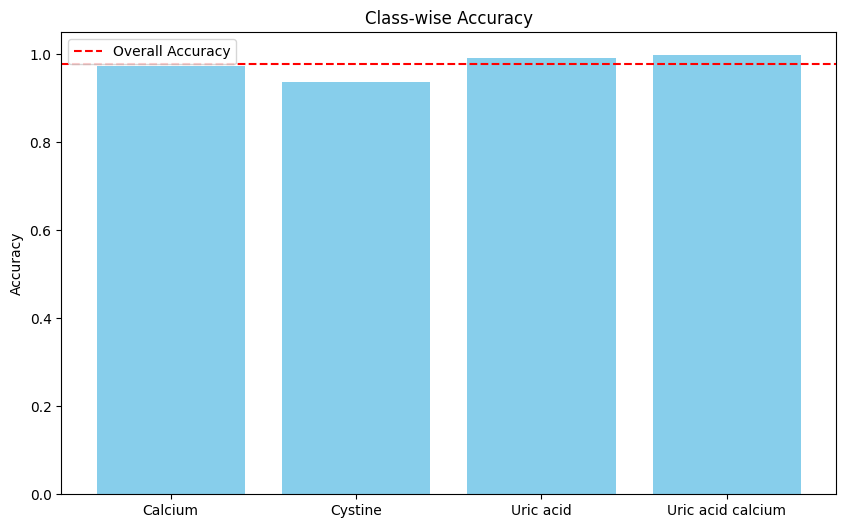

In [87]:
import numpy as np

# Вычисляем accuracy для каждого класса
class_acc = {}
for label, name in idx_info.items():
    class_samples = test_df[test_df['label'] == label]
    correct = (class_samples['label'] == class_samples['Predicted_label']).sum()
    class_acc[name] = correct / len(class_samples)

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(class_acc.keys(), class_acc.values(), color='skyblue')
plt.axhline(y=test_df['label'].eq(test_df['Predicted_label']).mean(), 
            color='r', 
            linestyle='--', 
            label='Overall Accuracy')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1.05)
plt.legend()
plt.show()

In [88]:
test_df.to_excel("test_df.xlsx")

In [109]:
#type_plasma_model.clear_memory()

In [89]:
Unclass_df

,Path,Type
0,Unclass/Stone 19_2_/10020_750_plasma.png,Unclass
1,Unclass/Stone 19_2_/10020_677_plasma.png,Unclass
2,Unclass/Stone 19_2_/10020_1031_plasma.png,Unclass
3,Unclass/Stone 19_2_/10020_1315_plasma.png,Unclass
4,Unclass/Stone 19_2_/10020_610_plasma.png,Unclass
...,...,...
19212,Unclass/Stone 11__/11_1054_plasma.png,Unclass
19213,Unclass/Stone 11__/11_535_plasma.png,Unclass
19214,Unclass/Stone 11__/11_61_plasma.png,Unclass
19215,Unclass/Stone 11__/11_920_plasma.png,Unclass


In [90]:
for i, row in tqdm(Unclass_df.iterrows(), total=len(Unclass_df), desc="Processing images"):
    image_path = row["Path"]
    
    result = type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(image_path)
    
    predicted_label = result['predicted_class']
    probabilities = result['probabilities'] 
    
    Unclass_df.at[i, 'Predicted_label'] = int(predicted_label)
    Unclass_df.at[i, 'Predicted_type'] = idx_info[predicted_label]
    Unclass_df.at[i, 'Confidence'] = result["confidence"]
    Unclass_df.at[i, 'prob_Calcium'] = probabilities[0]
    Unclass_df.at[i, 'prob_Cystine'] = probabilities[1]
    Unclass_df.at[i, 'prob_Uric acid'] = probabilities[2]
    Unclass_df.at[i, 'prob_Uric acid calcium'] = probabilities[3]
    

Processing images: 100%|██████████| 19217/19217 [02:15<00:00, 142.01it/s]


In [91]:
Unclass_df.to_excel("Unclass_df.xlsx")

In [92]:
Unclass_df

,Path,Type,Predicted_label,Predicted_type,Confidence,prob_Calcium,prob_Cystine,prob_Uric acid,prob_Uric acid calcium
0,Unclass/Stone 19_2_/10020_750_plasma.png,Unclass,0.0,Calcium,1.000000,1.000000,7.457368e-08,9.110155e-09,6.882418e-08
1,Unclass/Stone 19_2_/10020_677_plasma.png,Unclass,0.0,Calcium,1.000000,1.000000,1.082459e-07,7.840558e-09,1.020513e-07
2,Unclass/Stone 19_2_/10020_1031_plasma.png,Unclass,0.0,Calcium,0.999997,0.999997,9.792016e-07,1.588316e-06,8.545466e-07
3,Unclass/Stone 19_2_/10020_1315_plasma.png,Unclass,0.0,Calcium,0.999951,0.999951,1.133822e-05,2.827574e-06,3.441249e-05
4,Unclass/Stone 19_2_/10020_610_plasma.png,Unclass,0.0,Calcium,0.999999,0.999999,5.549502e-07,2.111723e-07,1.643471e-07
...,...,...,...,...,...,...,...,...,...
19212,Unclass/Stone 11__/11_1054_plasma.png,Unclass,0.0,Calcium,0.999983,0.999983,1.621462e-05,5.146208e-07,4.641220e-07
19213,Unclass/Stone 11__/11_535_plasma.png,Unclass,0.0,Calcium,0.999731,0.999731,2.931250e-06,5.189738e-07,2.653853e-04
19214,Unclass/Stone 11__/11_61_plasma.png,Unclass,1.0,Cystine,0.442263,0.250069,4.422629e-01,2.194309e-01,8.823746e-02
19215,Unclass/Stone 11__/11_920_plasma.png,Unclass,0.0,Calcium,1.000000,1.000000,5.391418e-08,1.739066e-08,8.316107e-08


Predicted_label
0.0    2887
1.0     571
2.0     507
3.0     242
Name: count, dtype: int64

In [94]:
Unclass_df["Predicted_label"].value_counts()

Predicted_label
0.0    17340
1.0     1436
3.0      374
2.0       67
Name: count, dtype: int64